<a href="https://colab.research.google.com/github/katoch30/DAV-Storytelling-JEE/blob/main/JEEdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  0 non-null      float64
 1   Batch      55 non-null     int64  
 2   Branch     55 non-null     object 
 3   Class      55 non-null     int64  
 4   Drop       55 non-null     object 
 5   Coaching   55 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ KB
None

Summary Statistics:
       Timestamp        Batch      Class
count        0.0    55.000000  55.000000
mean         NaN  2027.181818  10.527273
std          NaN     0.795611   1.561748
min          NaN  2025.000000   6.000000
25%          NaN  2027.000000  11.000000
50%          NaN  2027.000000  11.000000
75%          NaN  2028.000000  11.000000
max          NaN  2028.000000  12.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns

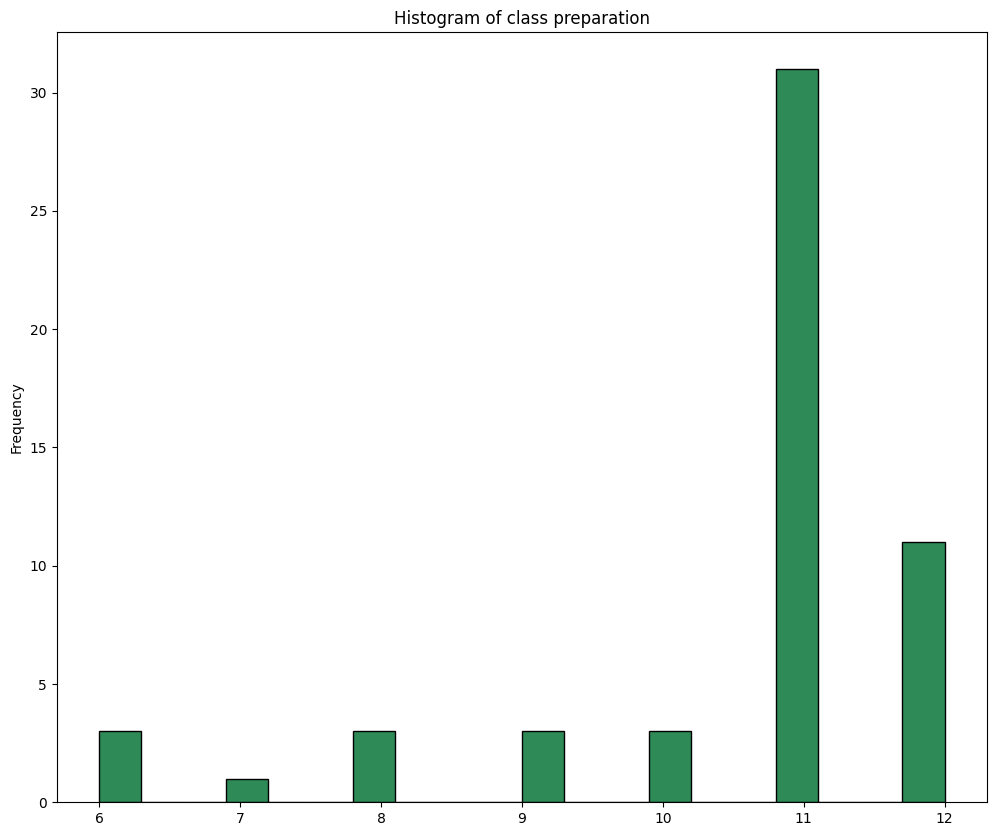

<ipython-input-4-3b8c5e5904af>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.replace(i, 'Other', inplace=True)


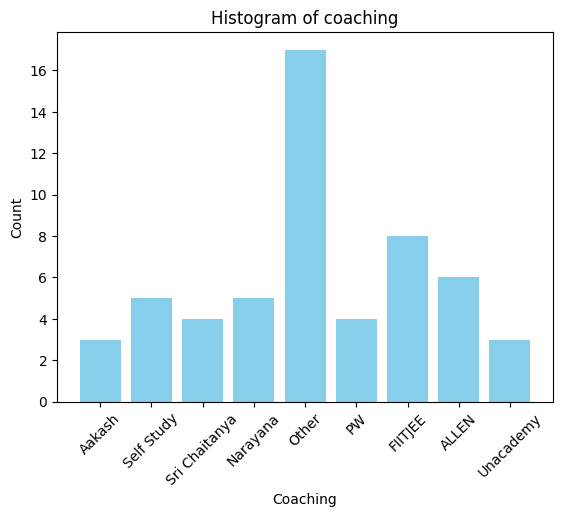

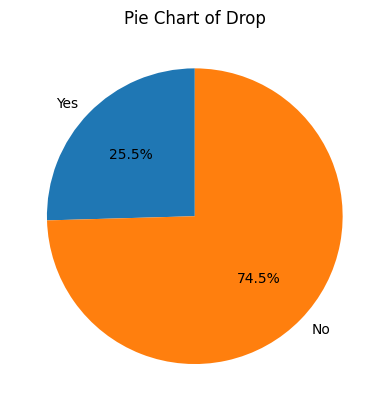

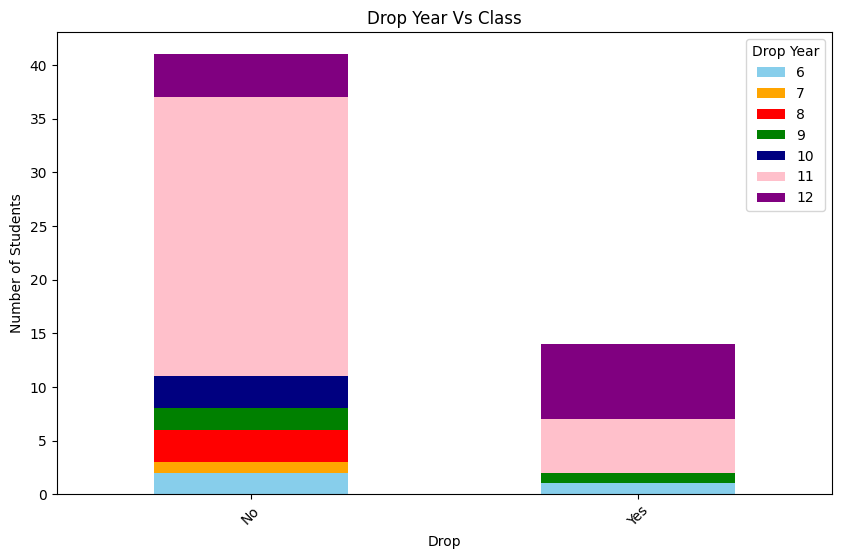

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df=pd.read_csv("Data - Form Responses 1.csv")

#print information
print("\nDataset Information:")
print(df.info())

#print summary statistics
print("\nSummary Statistics:")
print(df.describe())

#drop null values
cleaned_df=df.dropna(axis='columns')
print(cleaned_df.info())

#check for duplicates
duplicates=cleaned_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#plot class preparation data
cleaned_df["Class"].plot(kind='hist', bins=20, figsize=(12, 10), color='seagreen', edgecolor='black')
plt.title("Histogram of class preparation")
plt.show()

#change value of other coaching centre as 'Other'
for i in cleaned_df['Coaching']:
  if i not in ['Aakash','Self Study','Sri Chaitanya', 'Narayana','PW','FIITJEE','ALLEN','Unacademy']:
    cleaned_df.replace(i, 'Other', inplace=True)

#Count Coaching values
coach_count=Counter(cleaned_df['Coaching'])
#Plot Coaching data
plt.bar(coach_count.keys(), coach_count.values(), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Coaching")
plt.ylabel("Count")
plt.title("Histogram of coaching")
plt.show()

#Pie chart
drop_count=Counter(cleaned_df['Drop'])
plt.pie(drop_count.values(), labels=drop_count.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Drop")
plt.show()

#Group data by Drop and then count the values of Class
class_drop_counts = cleaned_df.groupby('Drop')['Class'].value_counts().unstack(fill_value=0)
#print(class_drop_counts)

# Plot the data
class_drop_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange','red','green','navy','pink','purple'], figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel("Drop")
plt.ylabel("Number of Students")
plt.title("Drop Year Vs Class")
plt.legend(title="Drop Year")
plt.show()
